# **Setup**
 
Reset the Python environment to clear it of any previously loaded variables, functions, or libraries. Then, import the libraries needed to complete the code Professor Melnikov presented in the video. 

In [2]:
%reset -f
from IPython.core.interactiveshell import InteractiveShell as IS
IS.ast_node_interactivity = "all"    # allows multiple outputs from a cell
import nltk, numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

<hr style="border-top: 2px solid #606366; background: transparent;">

# **Review**
 
You will build a term frequency–inverse document frequency (TF-IDF)  DTM from the list of quotes about language. This type of DTM represents quotes "better" than a count-based DTM, in a sense that it assigns common and frequent words lower weight than rare words or words that are common in only some of the documents. 
    
To get started, load the quotes.

In [3]:
LsQuotes = [
    "Learn a new language and get a new soul.",                   # Czech Proverb
    "A mistake is to commit a misunderstanding.",                 # Bob Dylan
    "Knowledge of languages is the doorway to wisdom.",           # Roger Bacon
    "Change your language and you change your thoughts.",         # Karl Albrecht
    "A different language is a different vision of life.",        # Federico Fellini
    "The limits of my language mean the limits of my world.",     # Ludwig Wittgenstein
    "To have another language is to possess a second soul.",      # Charlemagne
    "He who knows no foreign languages knows nothing of his own.", # Johann Wolfgang von Goethe
    "Learning is a treasure that will follow its owner everywhere.",  # Chinese Proverb
    "You can never understand one language until you understand at least two.",  # Geoffrey Willans
    "One language sets you in a corridor for life. Two languages open every door along the way.",  # Frank Smith
    "One should not aim at being possible to understand but at being impossible to misunderstand.",  # Marcus Fabius Quintilian
    "A special kind of beauty exists which is born in language, of language, and for language.",  # Gaston Bachelard
    "Language is the blood of the soul into which thoughts run and out of which they grow.",  # Oliver Wendell Holmes
    "Language is to the mind more than light is to the eye."      # William Gibson
]

print(f'{len(LsQuotes)} quotes')

15 quotes


There are two ways to build a TF-IDF DTM, and you'll practice both of them in this activity.

1. Compute a count-based DTM and then apply TF-IDF weighting formula to convert counts to meaningful weights. 
    1. `CountVectorizer` $\rightarrow$ [`TfidfTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html)
1. Call [`TfidfVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html) directly, which will do counting and weighing.

These methods differ both in how they affect preprocessing and in how they might be used in production. 

<hr style="border-top: 2px solid #606366; background: transparent;">

## Part 1: Convert Counts to Weights With `CountVectorizer` and `TfidfTransformer`

In the first approach, you'll begin by creating a sparse matrix of raw counts. First, you'll create a `CountVectorizer` object that will allow you to count preprocessed words. Then, you'll create a DTM in sparse matrix form using the `fit_transform()` method with the `CountVectorizer` object you created. 

In [4]:
cv = CountVectorizer(stop_words='english', lowercase=True, preprocessor=None) # create object to count pre-processed words
smDT = cv.fit_transform(LsQuotes)     # create document-term matrix (DTM) in sparse matrix format
smDT

<15x48 sparse matrix of type '<class 'numpy.longlong'>'
	with 64 stored elements in Compressed Sparse Row format>

As before when you created a DTM, you can retrieve a vocabulary of words after the vectorizer has performed some basic and default preprocessing, e.g., removal of English stopwords, lowercasing, tokenization, etc.

In [5]:
LsVocab = cv.get_feature_names()           # create a vocabulary of unique words in our corpus
print(LsVocab)

['aim', 'beauty', 'blood', 'born', 'change', 'commit', 'corridor', 'different', 'door', 'doorway', 'exists', 'eye', 'follow', 'foreign', 'grow', 'impossible', 'kind', 'knowledge', 'knows', 'language', 'languages', 'learn', 'learning', 'life', 'light', 'limits', 'mean', 'mind', 'mistake', 'misunderstand', 'misunderstanding', 'new', 'open', 'owner', 'possess', 'possible', 'run', 'second', 'sets', 'soul', 'special', 'thoughts', 'treasure', 'understand', 'vision', 'way', 'wisdom', 'world']


Next, you will transform the counts to weights using <code>TfidfTransformer</code>, which has a <code>fit_transform()</code> method to compute (i.e., fit) vocabulary from the given documents and transform the document counts to weights in the DTM. Click the button below to learn more about TF-IDF formula used by `fit_transform`. 

<details style="margin-top:20px;border-radius:20px">
    <summary>
        <div id="button" style="background-color:#eee;padding:10px;border:1px solid black;border-radius:20px">
            <font color=#B31B1B>▶ </font> 
            <b>TfidfTransformer's <code>fit_transform</code> Formula</b>
        </div>
    </summary>
    <div id="button_info" style="padding:10px">
There are many versions of the TF-IDF formula; and each one tries to alleviate some bias or error, such as bias from longer documents or error from lack of a word in any document or presence of a word in every document, etc. Scikit-Learn provides details and documentation about these flavors. These versions can be controlled via parameters of the <code>TfidfTransformer</code>. You can use the default parameters but tune them as needed if you observe long documents and other anomalies. Here is the default formula: 
        $$\begin{align}
\text{tf-idf}_{d,t}&:=\text{tf}_{d,t}\cdot \text{idf}_{t}\\
\text{idf}_t &:= \log(n / \text{df}_t) + 1 \,\,\,\,\,\,\,\, \text{if smooth_idf = False; scikit-learn's implementation}\\
\text{idf}_t &:= \log(n / \text{df}_t + 1) \,\,\,\,\,\,\,\, \text{typical implementation}
\end{align}$$

* $f_{d,t}$ is the count of terms (i.e., word) $t$ in document (i.e., quote) $d$; i.e., this is the count from DTM $\text{DT_smatrix}_{d,t}$.
* $n$ is the total number of documents.
* $t$ indicates a term (column index), $d$ indicates a document (row index).
* $\text{df}_t$ is a document frequency or count of a word $t$ across documents.
* $+1$ is the smoothing term, which handles situations when the vocabulary word is not in any sentence. Scikit-learn adds the smoothing term to $\text{idf}$ directly, while other implementations keep it inside the logarithm.
* $\log()$ dampens the growth of $n/\text{df}_t$. When $n$ is large and a word $t$ appears in very few documents, $n / \text{df}_t$ is huge and $\log()$ effectively reduces this fraction in monotonic way, meaning that if $a<b$ then $\log(a)\le \log(b)$, so the order is preserved.
    </div>
</details>

### Create the TF-IDF Matrix

<span style="color:black">Convert the resulting weight matrix to a NumPy array with the `toarray()` method, and color the TF-IDF matrix to highlight the most informative words and corresponding documents.

The `norm` parameter in the [TfidfTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html) module adjusts the length of the document vectors in the TF-IDF matrix. The default is `norm='l2'`, which rescales every document vector to a unit vector, i.e., a vector of Euclidean length 1. This makes the computed word weights comparable across the given documents. 

Note that longer documents tend to have a smaller contribution of a larger number of word weights to the total weight (fixed at 1). Hence, longer documents have a bias towards lower word weights. If you have documents of greatly varying lengths, you may want to turn off `norm='l2'` normalization. 

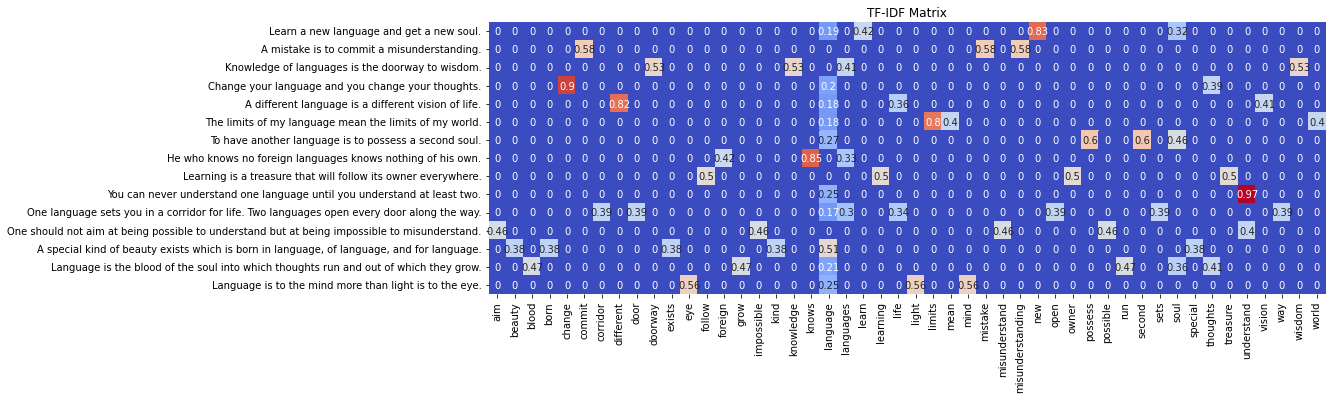

In [6]:
smTFIDF1 = TfidfTransformer(norm='l2', use_idf=True, smooth_idf=True).fit_transform(smDT) # fit and transform

dfTFIDF1 = pd.DataFrame(smTFIDF1.toarray(), index=LsQuotes, columns=LsVocab)

plt.rcParams['figure.figsize'] = [15, 5]   # plot wider figures
ax = sns.heatmap(dfTFIDF1, annot=True, cmap='coolwarm', cbar=False);
_ = ax.set_title('TF-IDF Matrix');

<span style="color:black">Take a moment to examine the TF-IDF matrix you've created. Notice that "language" appears with low weights across numerous documents, because it is automatically identified as a generic word that does not differentiate these documents. On the other hand, the word "understand" is very important (with weight 0.97) to the document in which it is used twice and less so in the document where it is used only once. Notice that TF-IDF treats "understand" and "misunderstand" as different words, although you might consider them both relating to understanding.

Review the matrix above carefully and note the following:

1. The weights vary between 0 and 1, with higher values indicating greater importance of words. 
1. Most quotes have four to six words that were not filtered out as stopwords.
1. Longer quotes tend to have more words that were not filtered out as stopwords.
1. Most words appear to have weights between .3 and .6.
1. "*language*" is a common word and has low weights, reaching 0.18 in the second quote.
    1. Can you find other common words?
    1. Do you note any words that you would consider very similar (same lemma or synonyms)?

Confirm the vector length below. The dot product of the vector with itself returns the square of its Euclidean length. However, if the returned value is 1, then the square root is also 1, as is the length of such a vector, also called a unit vector.

In [7]:
dfTFIDF1.iloc[0,:] @ dfTFIDF1.iloc[0,:]  # dot product of the topmost row with itself

1.0

You can visualize the distribution of non-zero weights. If you disable the stopwords filter, then each quote will have more words contributing to vocabulary (in fact, there should be 90 words, instead of 48 - nearly doubling). Then, due to document-vector-length normalization, a histogram displaying weights would shift to lower weights. The words contributing to the right tail of this distribution are likely to be important (in representing unique documents). 

The histogram is a great summarization tool when a DTM table is too large to evaluate directly. Instead, you can evaluate the distribution of weights using a histogram or some other visualization tool (for example, box plots) to look for common and unusual weights for tokens, possibly needing additional preprocessing. Such a tool can draw your attention to smaller parts of the DTM table which can be evaluated next.

Take a look at an example of this below. We note some counts of words with large weights (>0.7). A reasonable next step would be to investigate the tokens and whether some preprocessing methods can generalize these words so that they collapse with some other tokens rather than remain unique.

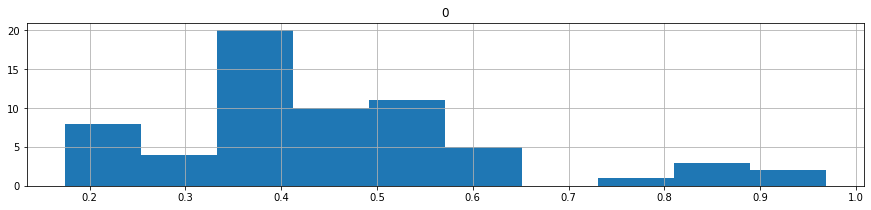

In [8]:
aNonZeroValues = dfTFIDF1.values[(dfTFIDF1>0).values]
pd.DataFrame(aNonZeroValues).hist(figsize=[15,3]);

<hr style="border-top: 2px solid #606366; background: transparent;">

## Part 2: Compute Weights Directly With `TfidfVectorizer`

You can now try the second method and use it to explore the treatment of new words. Say you only have access to the first 14 documents at training (i.e., fitting) time. The last quote (with new words "*light*" and "*eye*") arrives later.

<span style="color:black">First, you will build the TF-IDF matrix with `TfidfVectorizer` and default parameters. None of the stopwords are filtered out, so the matrix is a bit wide.

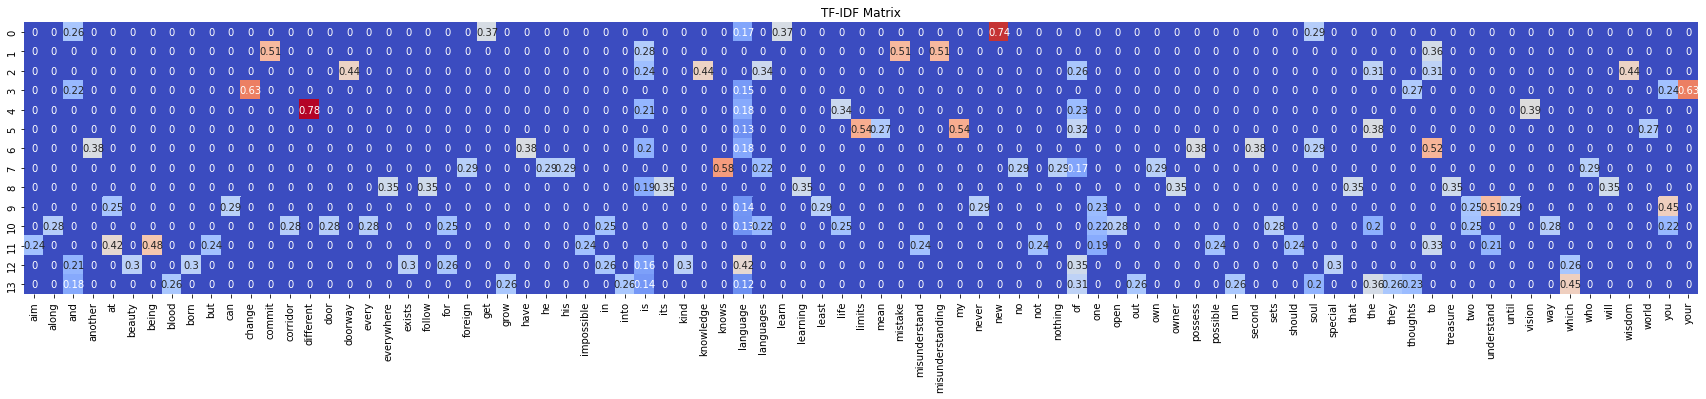

In [9]:
tv = TfidfVectorizer()
smTFIDF2 = tv.fit_transform(LsQuotes[:-1]) # fit and transform only 14 quotes, return sparse matrix format

dfTFIDF2 = pd.DataFrame(smTFIDF2.toarray(), columns=tv.get_feature_names())

plt.rcParams['figure.figsize'] = [30, 5]   # set figure size
ax = sns.heatmap(dfTFIDF2, annot=True, cmap='coolwarm', cbar=False);
_ = ax.set_title('TF-IDF Matrix');

<span style="color:black">Here, you did not remove stopwords and weights have changed from those you had above. While "*language*" still has low weights, the word "*understand*" is no longer of great importance. Instead, the words "*different*" and "*new*" stepped up in importance.

Now you can apply the fitted vectorizer to quote 15.

Language is to the mind more than light is to the eye.


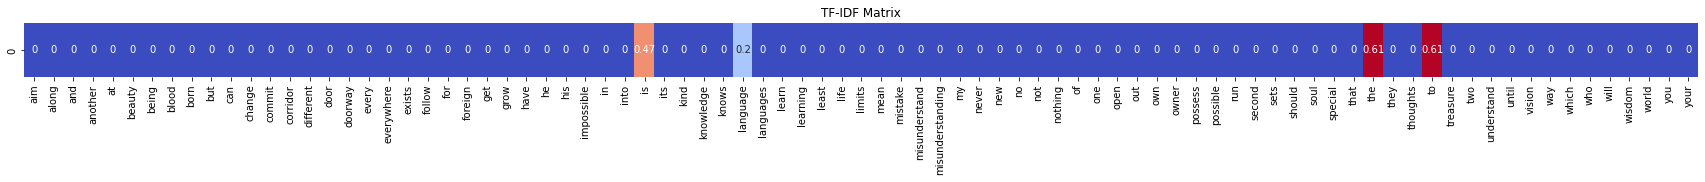

In [10]:
s14 = LsQuotes[-1]  # retrieve last quote in the list
print(s14)
tvS14 = tv.transform([s14]).toarray()

dfTFIDF2 = pd.DataFrame(tvS14, columns=tv.get_feature_names())

plt.rcParams['figure.figsize'] = [30, 1]   # plot wider figures
ax = sns.heatmap(dfTFIDF2, annot=True, cmap='coolwarm', cbar=False);
_ = ax.set_title('TF-IDF Matrix');

<span style="color:black">Note that the vectorizer is unable to provide weights for the words "*light*" and "*eye*" since they are not in the vectorizer's vocabulary. In order for you to add these words to vocabulary, you would need to fit the vectorizer on all 15 quotes. This is a drawback in production, since refitting is time consuming. 
    
## Interpreting a TF-IDF Matrix

    
<span style="color:black">Choosing how you preprocess text depends on the problem being solved and the situation at hand. That's why interpretation of the TF-IDF matrix is very important. If your analysis highlights words as important that you don't think are important for the problem you're solving, then you can use the vectorizer's parameters to tune the model to better align with the goals of your analysis.

<hr style="border-top: 2px solid #606366; background: transparent;">

# **Optional Practice**

Now, equipped with these concepts and tools, you will practice a few related tasks.

As you work through these tasks, check your answers by running your code in the *#check solution here* cell, to see if you’ve gotten the correct result. If you get stuck on a task, click the See **solution** drop-down to view the answer.

## Task 1

Compute the sparsity (herein as the fraction of zeros) in the count-based DTM `smDT`.

<b>Hint:</b> Try <code>nnz</code> attribute of a sparse matrix which returns the count of non-zero elements. Or you can convert it to a NumPy array to have access to more familiar masking functions and comparisons.

In [ ]:
# check solution here


<font color=#606366>
    <details><summary><font color=#b31b1b>▶ </font>See <b>solution</b>.</summary>
    <pre>
# Solution 1:
1 - smDT.nnz / smDT.shape[0] / smDT.shape[1]
# Solution 2:
np.mean(smDT.toarray() == 0)
    </pre>
    </details> 
</font>
<hr>


## Task 2

Compute the sparsity (fraction of zeros) in the TF-IDF `dfTFIDF1`. 

How do the count-based and the derived weight-based document-term matrices compare in sparsity? 

<b>Hint:</b> You can create a mask for a DataFrame, which indicates which elements are zeros or non-zeros. A summation can then be applied to count zeros or non-zeros.


In [ ]:
# check solution here


<font color=#606366>
    <details><summary><font color=#b31b1b>▶ </font>See <b>solution</b>.</summary>
    <pre>
# Solution 1:
(dfTFIDF1 == 0).sum().sum() / dfTFIDF1.shape[0] / dfTFIDF1.shape[1]
# Solution 2: 
np.mean((dfTFIDF1 == 0).values)

The two matrices have the same sparsity.
    </pre>
    </details> 
</font>
<hr>

## Task 3 

Check whether non-zero values match in their locations in two tables, `smDT` and `dfTFIDF1`.

<b>Hint:</b> You can compare two NumPy arrays element-wise simply by using <code>==</code> operator for two objects. This returns a mask, i.e., an array of Booleans. Then you can use <code>np.all</code> to evaluate whether all elements are true.

In [ ]:
# check solution here


<font color=#606366>
    <details><summary><font color=#b31b1b>▶ </font>See <b>solution</b>.</summary>
    <pre>
np.all((smDT.toarray() > 0) == (dfTFIDF1 > 0))
    </pre>
    </details> 
</font>
<hr>

## Task 4

If we define a word's importance is its maximum weight across all quotes, what are the three most important words in `dfTFIDF1`?

<b>Hint:</b> Try <code>max()</code> method of a DataFrame to retrieve max value from each column. This returns a Pandas Series object, which still has <code>sort_values()</code> method. 


In [ ]:
# check solution here


<font color=#606366>
    <details><summary><font color=#b31b1b>▶ </font>See <b>solution</b>.</summary>
    <pre>
STop3 = dfTFIDF1.max().sort_values(ascending=False).head(3)  # Pandas Series object
STop3
    </pre>
    </details> 
</font>
<hr>

## Task 5

Find all quotes containing the most important word token (found in the previous task) as a substring, i.e., regardless of any affixes. For example, given the word `eat`, find all words containing `eat`, such as `eat`, `meat`, `eats`, `eating`, `beat`, but not `ate` (which doesn't contain `eat` as a substring).

Do these quotes look semantically similar to you? (In other words, are the quotes similar in their meaning?)

<b>Hint:</b> You can iterate over each quote using a list comprehension with a condition, which checks whether the most important word is a substring in the sentence or not.

In [ ]:
# check solution here


<font color=#606366>
    <details><summary><font color=#b31b1b>▶ </font>See <b>solution</b>.</summary>
    <pre>
[s for s in LsQuotes if STop3.index[0] in s]
    </pre>
    </details> 
</font>
<hr>

## Task 6

Use [`WordNetLemmatizer()`](https://www.nltk.org/_modules/nltk/stem/wordnet.html) in `NLTK` to replace words with their lemmas in each of the 15 quotes. Save the results into a list `LsQuotesLemmas`. Review the resulting lemmatized quotes. 

What do you think of the quality of WordNet lemmatizer? For example, were the words "knows," "sets," "exists," "misunderstanding," "is," "limits," and "languages" correctly lemmatized?

<b>Hint:</b> You have done lemmatization a few times before, so this should not be new. You might need a function — say <code>Penn2WN()</code> — to convert a single Penn POS tag to WordNet POS tag. Then create a function — say <code>Penn2WN_Sent</code> — to use this function to convert all POS tags in a sentence, which is a list of tuples (word, Penn POS tag). Then you can use this function to lemmatize words derived from <code>nltk.word_tokenize()</code> and <code>nltk.pos_tag()</code>. Finally, use the <code>join()</code> method of a string object to glue all lemmatized words of a sentence into a single sentence (since tokenizer will tokenize the words internally). The last step could be avoided if we tell the tokenizer that the words are already tokenized. However, we would still need to join words to ease evaluation of the lemmatized sentences.

In [ ]:
# check solution here


<font color=#606366>
    <details><summary><font color=#b31b1b>▶ </font>See <b>solution</b>.</summary>
    <pre>
_ = nltk.download(['wordnet'], quiet=True)
wlo = nltk.stem.WordNetLemmatizer()   # WordNet lemmatizer object
# convert Penn Treebank tags to Wordnet tags:
Penn2WN      = lambda t='VB': t[0].lower() if t[0] in ('V','R','A') else 'n' 
# convert tags in a sentence:
Penn2WN_Sent = lambda LTsSent=[('I','PRP'),('ran','VBD')]: [(w, Penn2WN(t)) for w,t in LTsSent] 
# lemmatize words in sentence:
GetLemma     = lambda LTsSent=[('I','n'),('ran','v')]:     [wlo.lemmatize(w,t) for w,t in LTsSent] 
PipeSent     = lambda s='I ran': GetLemma(Penn2WN_Sent(nltk.pos_tag(nltk.word_tokenize(s))))
LsQuotesLemmas = [' '.join(PipeSent(s)) for s in LsQuotes]
LsQuotesLemmas
    </pre>
    </details> 
</font>
<hr>

## Task 7

In one step, create a TF-IDF matrix using `TfidfVectorizer()`, using the same the parameter values that you used with `CountVectorizer` and `TfidfTransformer`. Save your results to `dfLem` DataFrame with proper indices and column names.

<b>Hint:</b> See the code above in Part 1.

In [ ]:
# check solution here



<font color=#606366>
    <details><summary><font color=#b31b1b>▶ </font>See <b>solution</b>.</summary>
    <pre>
tv = TfidfVectorizer(stop_words='english', lowercase=True, preprocessor=None, norm='l2', use_idf=True, smooth_idf=True)
dfLem = pd.DataFrame(tv.fit_transform(LsQuotesLemmas).toarray(), index=LsQuotesLemmas, columns=tv.get_feature_names())

plt.rcParams['figure.figsize'] = [30, 5]
ax = sns.heatmap(dfLem, annot=True, cmap='coolwarm', cbar=False);
_ = ax.set_title('TF-IDF Matrix');
    </pre>
    </details> 
</font>
<hr>

## Task 8 

Find the top three most important words in `dfLem` as you did above. 

Are there any changes to words or their weights? Which list of top three words seem more appropriate to you?

<b>Hint:</b> See code above, where you already found the three most important words.

In [ ]:
# check solution here

<font color=#606366>
    <details><summary><font color=#b31b1b>▶ </font>See <b>solution</b>.</summary>
    <pre>
STopLemm3 = dfLem.max().sort_values(ascending=False).head(3)  # Pandas Series object
STopLemm3
    </pre>
    </details> 
</font>
<hr>

## Task 9

The following example uses [SpaCy](https://spacy.io/api/lemmatizer) library to lemmatize words:

    import spacy
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(u"Apples and oranges are similar. Boots and hippos aren't.")
    ' '.join([token.lemma_ for token in doc])

Apply this lemmatization to `LsQuotes` and identify the three most important words once again. 

Has this list changed? Which of the three lists do you favor?

<b>Hint:</b> This is similar to what you did in the previous few tasks; just apply SpaCy's lemmatizer this time.

In [ ]:
# check solution here


<font color=#606366>
    <details><summary><font color=#b31b1b>▶ </font>See <b>solution</b>.</summary>
    <pre>
import spacy
nlp = spacy.load('en_core_web_sm')
LsQuotesLemmas2 = [' '.join([token.lemma_ for token in nlp(s)]) for s in LsQuotes]

tv = TfidfVectorizer(stop_words='english', lowercase=True, preprocessor=None, norm='l2', use_idf=True, smooth_idf=True)
dfLem = pd.DataFrame(tv.fit_transform(LsQuotesLemmas2).toarray(), index=LsQuotesLemmas2, columns=tv.get_feature_names())

plt.rcParams['figure.figsize'] = [30, 5]
ax = sns.heatmap(dfLem, annot=True, cmap='coolwarm', cbar=False);
_ = ax.set_title('TF-IDF Matrix');

STopLemm3 = dfLem.max().sort_values(ascending=False).head(3)  # Pandas Series object
STopLemm3
    </pre>
    </details> 
</font>
<hr>